In [4]:
import pandas as pd
import os


files = [file for file in os.listdir('./individual_stocks_5yr/')]
stock = pd.DataFrame()

for file in files:
    df = pd.read_csv('./individual_stocks_5yr/'+file)
    stock=pd.concat([stock,df])

stock.to_csv('SP500.csv')



In [5]:
df = pd.read_csv('SP500.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,date,open,high,low,close,volume,Name
0,0,NaN,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL
1,1,NaN,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL
2,2,NaN,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL
3,3,NaN,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,AAL
4,4,NaN,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,AAL


In [11]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [12]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  float64
 6   Name    619040 non-null  object 
dtypes: float64(5), object(2)
memory usage: 33.1+ MB


In [14]:
df.shape

(619040, 7)

In [15]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [17]:
df.dropna()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259.0,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187.0,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031.0,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323.0,ZTS


In [18]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,AAL


In [19]:
pd.to_datetime(df['date'])

0        2013-02-08
1        2013-02-11
2        2013-02-12
3        2013-02-13
4        2013-02-14
            ...    
619035   2018-02-01
619036   2018-02-02
619037   2018-02-05
619038   2018-02-06
619039   2018-02-07
Name: date, Length: 619040, dtype: datetime64[ns]

In [20]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,AAL


In [48]:
volume_by_Name = pd.DataFrame(df.groupby(['Name','date'])['volume'].sum())
volume_by_Name.rename(columns={'volume':'Volume'},inplace=True)

volume_by_Name


Volume
Name date                 
A    2013-02-08  1824755.0
     2013-02-11  2915405.0
     2013-02-12  2373731.0
     2013-02-13  2052338.0
     2013-02-14  3826245.0
...                    ...
ZTS  2018-02-01  2982259.0
     2018-02-02  2595187.0
     2018-02-05  2962031.0
     2018-02-06  4924323.0
     2018-02-07  4534912.0

[619040 rows x 1 columns]

In [69]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,AAL


In [78]:
volumeA = df.loc[(df['Name']=='A')]
volumeA

,date,open,high,low,close,volume,Name
71611,2013-02-08,45.07,45.350,45.000,45.08,1824755.0,A
71612,2013-02-11,45.17,45.180,44.450,44.60,2915405.0,A
71613,2013-02-12,44.81,44.950,44.500,44.62,2373731.0,A
71614,2013-02-13,44.81,45.240,44.680,44.75,2052338.0,A
71615,2013-02-14,44.72,44.780,44.360,44.58,3826245.0,A
...,...,...,...,...,...,...,...
72865,2018-02-01,73.18,73.780,72.510,72.83,2008177.0,A
72866,2018-02-02,72.32,72.760,71.220,71.25,1955697.0,A
72867,2018-02-05,70.86,71.480,68.180,68.22,2860726.0,A
72868,2018-02-06,66.96,68.830,66.130,68.45,4121239.0,A


In [79]:
import matplotlib.pyplot as plt

In [90]:
volumeA['Month'] = pd.to_datetime(volumeA['date']).apply(lambda x: x.strftime('%Y-%m'))
volumeA

<ipython-input-90-6fe3859935c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volumeA['Month'] = pd.to_datetime(volumeA['date']).apply(lambda x: x.strftime('%Y-%m'))


,date,open,high,low,close,volume,Name,Month
71611,2013-02-08,45.07,45.350,45.000,45.08,1824755.0,A,2013-02
71612,2013-02-11,45.17,45.180,44.450,44.60,2915405.0,A,2013-02
71613,2013-02-12,44.81,44.950,44.500,44.62,2373731.0,A,2013-02
71614,2013-02-13,44.81,45.240,44.680,44.75,2052338.0,A,2013-02
71615,2013-02-14,44.72,44.780,44.360,44.58,3826245.0,A,2013-02
...,...,...,...,...,...,...,...,...
72865,2018-02-01,73.18,73.780,72.510,72.83,2008177.0,A,2018-02
72866,2018-02-02,72.32,72.760,71.220,71.25,1955697.0,A,2018-02
72867,2018-02-05,70.86,71.480,68.180,68.22,2860726.0,A,2018-02
72868,2018-02-06,66.96,68.830,66.130,68.45,4121239.0,A,2018-02


<function matplotlib.pyplot.show(close=None, block=None)>

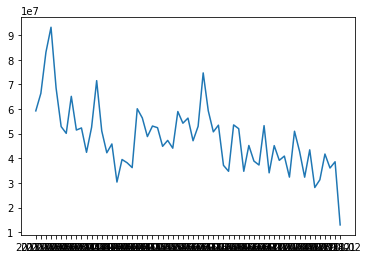

In [89]:
months = [x for x, df in volumeA.groupby('Month')]

plt.plot(months, volumeA.groupby('Month')['volume'].sum())
plt.show